In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors


# Make some illustrative fake data:

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

# testing done with An

In [2]:
colors1 = plt.cm.rainbow(np.linspace(0., 1, 3))
colors2 = plt.cm.seismic(np.linspace(0, 1, 3))

colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [3]:
print(colors1)
print()
print(colors2)
print()
print(colors)

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]

[[0.         0.         0.3        1.        ]
 [1.         0.99215686 0.99215686 1.        ]
 [0.5        0.         0.         1.        ]]

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.00000000e-01 1.00000000e+00]
 [1.00000000e+00 9.92156863e-01 9.92156863e-01 1.00000000e+00]
 [5.00000000e-01 0.00000000e+00 0.00000000e+00 1.00000000e+00]]


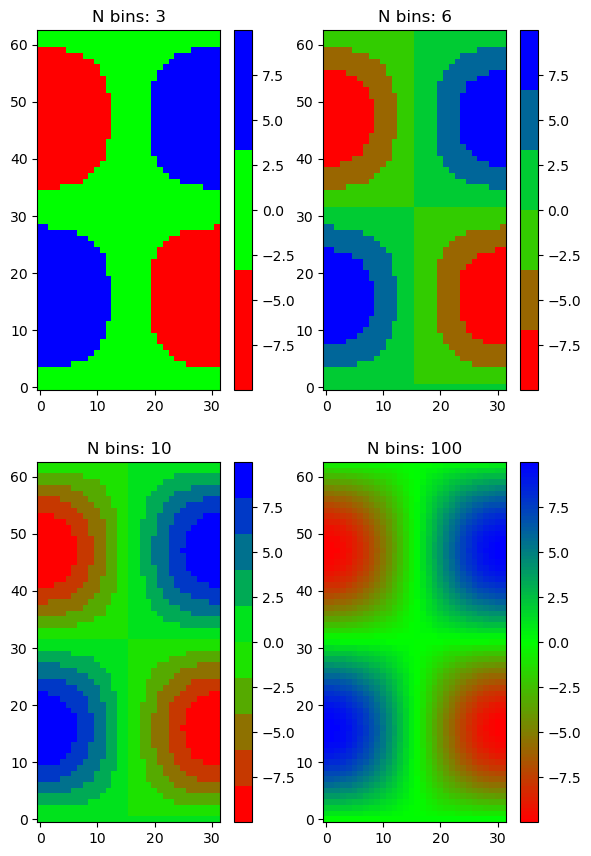

In [6]:
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
for n_bin, ax in zip(n_bins, axs.flat):
    # Create the colormap
    cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)
    # Fewer bins will result in "coarser" colomap interpolation
    im = ax.imshow(Z, origin='lower', cmap=cmap)
    ax.set_title("N bins: %s" % n_bin)
    fig.colorbar(im, ax=ax)

# from chatgpt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a custom normalization function
class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0, clip=False):
        self.midpoint = midpoint
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Handle the case of exact midpoints
        if np.ma.is_masked(value):
            return np.ma.masked
        result, is_scalar = self.process_value(value)
        (vmin, vmax, midpoint) = self.vmin, self.vmax, self.midpoint
        if vmin == vmax:
            result.fill(0)  # Avoid divide-by-zero
        elif vmin > vmax:
            raise ValueError("minvalue must be less than or equal to maxvalue")
        else:
            result -= vmin
            result /= (vmax - vmin)
            result = np.ma.masked_array(np.interp(result, [0, 0.5, 1], [0, 0.5, 1]), np.ma.getmask(result))

        if is_scalar:
            result = result[0]
        return result

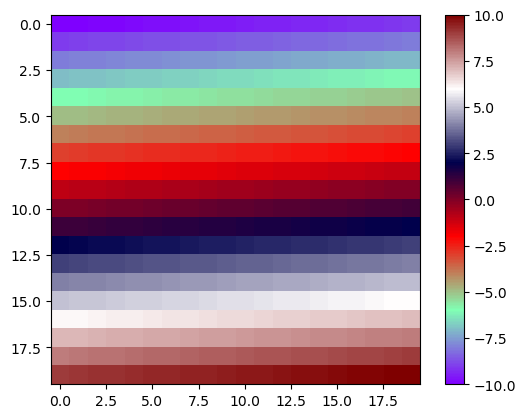

In [3]:
# Create the data
data = np.linspace(-10, 10, 400).reshape(20, 20)

# Normalize the ranges
norm1 = mcolors.Normalize(vmin=-10, vmax=0)
norm2 = mcolors.Normalize(vmin=0, vmax=10)

# Create the two colormaps
cmap1 = plt.cm.rainbow
cmap2 = plt.cm.seismic

# Combine the colormaps
colors1 = cmap1(np.linspace(0, 1, 3))
colors2 = cmap2(np.linspace(0, 1, 3))
colors = np.vstack((colors1, colors2))
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)


# Plot the data with the custom colormap and normalization
fig, ax = plt.subplots()
norm = MidpointNormalize(vmin=-10, vmax=10, midpoint=0)
cax = ax.imshow(data, cmap=custom_cmap, norm=norm)
fig.colorbar(cax)

plt.show()


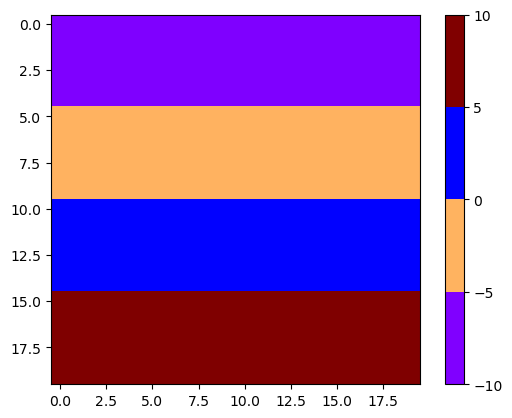

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create the data
data = np.linspace(-10, 10, 400).reshape(20, 20)

# Normalize the ranges
norm1 = mcolors.Normalize(vmin=-10, vmax=0)
norm2 = mcolors.Normalize(vmin=0, vmax=10)

# Create the two colormaps
cmap1 = plt.cm.rainbow
cmap2 = plt.cm.seismic

# Define 3 discrete colors for each colormap
colors1 = cmap1(np.linspace(0, 1, 5))
colors2 = cmap2(np.linspace(0, 1, 5))
colors = np.vstack((colors1, colors2))

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create a custom normalization function with discrete boundaries
boundaries = [-10, -5, 0, 5, 10]
norm = mcolors.BoundaryNorm(boundaries, custom_cmap.N)

# Plot the data with the custom colormap and normalization
fig, ax = plt.subplots()
cax = ax.imshow(data, cmap=custom_cmap, norm=norm)
fig.colorbar(cax, boundaries=boundaries, ticks=boundaries)

plt.show()